In [1]:
library('QuantPsyc')
library('Rcmdr')

Loading required package: boot
Loading required package: MASS

Attaching package: 'QuantPsyc'

The following object is masked from 'package:base':

    norm

Loading required package: splines
Loading required package: RcmdrMisc
Loading required package: car
Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:boot':

    logit

Loading required package: sandwich
Loading required package: effects
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
lattice theme set by effectsTheme()
See ?effectsTheme for details.
The Commander GUI is launched only in interactive sessions

Attaching package: 'Rcmdr'

The following object is masked from 'package:base':

    errorCondition



In [2]:
album1 <- read.delim('Album Sales 1.dat', header = TRUE)

In [3]:
head(album1)

adverts,sales
10.256,330
985.685,120
1445.563,360
1188.193,270
574.513,220
568.954,170


In [4]:
albumSales.1 <- lm(sales ~ adverts, data = album1)

In [5]:
summary(albumSales.1)


Call:
lm(formula = sales ~ adverts, data = album1)

Residuals:
     Min       1Q   Median       3Q      Max 
-152.949  -43.796   -0.393   37.040  211.866 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.341e+02  7.537e+00  17.799   <2e-16 ***
adverts     9.612e-02  9.632e-03   9.979   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 65.99 on 198 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.3313 
F-statistic: 99.59 on 1 and 198 DF,  p-value: < 2.2e-16


--------------
Multiple regression

In [6]:
album2 <- read.delim("Album Sales 2.dat", header = TRUE)

In [7]:
albumSales.2 <- lm(sales ~ adverts, data = album2)

In [8]:
albumSales.3 <- lm(sales ~ adverts + airplay + attract, data = album2)

In [9]:
summary(albumSales.2)


Call:
lm(formula = sales ~ adverts, data = album2)

Residuals:
     Min       1Q   Median       3Q      Max 
-152.949  -43.796   -0.393   37.040  211.866 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.341e+02  7.537e+00  17.799   <2e-16 ***
adverts     9.612e-02  9.632e-03   9.979   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 65.99 on 198 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.3313 
F-statistic: 99.59 on 1 and 198 DF,  p-value: < 2.2e-16


In [10]:
summary(albumSales.3)


Call:
lm(formula = sales ~ adverts + airplay + attract, data = album2)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.324  -28.336   -0.451   28.967  144.132 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.612958  17.350001  -1.534    0.127    
adverts       0.084885   0.006923  12.261  < 2e-16 ***
airplay       3.367425   0.277771  12.123  < 2e-16 ***
attract      11.086335   2.437849   4.548 9.49e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.09 on 196 degrees of freedom
Multiple R-squared:  0.6647,	Adjusted R-squared:  0.6595 
F-statistic: 129.5 on 3 and 196 DF,  p-value: < 2.2e-16


In [11]:
lm.beta(albumSales.3)

adverts   airplay   attract 
0.5108462 0.5119881 0.1916834

In [12]:
confint(albumSales.3)

,2.5 %,97.5 %
(Intercept),-60.82960967,7.60369295
adverts,0.07123166,0.09853799
airplay,2.81962186,3.91522848
attract,6.27855218,15.89411823


In [13]:
anova(albumSales.2, albumSales.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
198,862264.2,NA,NA,NA,NA
196,434574.6,2,427689.6,96.44738,6.879395e-30


In [14]:
album2$standardized.residuals <- rstandard(albumSales.3)
album2$studentized.residuals <- rstudent(albumSales.3)
album2$cooks.distance <- cooks.distance(albumSales.3)
album2$dfbeta <- dfbeta(albumSales.3)
album2$dffit <- dffits(albumSales.3)
album2$leverage <- hatvalues(albumSales.3)
album2$covariance.ratios <- covratio(albumSales.3)

In [15]:
print(album2)

     adverts sales airplay attract standardized.residuals studentized.residuals
1     10.256   330      43      10            2.177404082           2.198596330
2    985.685   120      28       7           -2.323082779          -2.349723708
3   1445.563   360      35       7            1.468801552           1.473179919
4   1188.193   270      33       7            0.150115954           0.149741124
5    574.513   220      44       5           -0.123798339          -0.123486952
6    568.954   170      19       5            0.618259707           0.617282712
7    471.814    70      20       1           -0.487199936          -0.486250013
8    537.352   210      22       9            0.367864064           0.367051168
9    514.068   200      21       7            0.738553074           0.737693803
10   174.093   300      40       7            2.130288776           2.149882067
11  1720.806   290      32       7           -0.319744224          -0.319010718
12   611.479    70      20       2      

In [16]:
write.table(album2, "Album Sales With Diagnostics.dat", sep = "\t", row.names
= FALSE)

In [17]:
album2$large.residual <- album2$standardized.residuals > 2 | album2$standardized.residuals < -2

In [18]:
sum(album2$large.residual) 

[1] 12

In [19]:
album2[album2$large.residual,c("sales", "airplay", "attract", "adverts", "standardized.residuals")]

,sales,airplay,attract,adverts,standardized.residuals
1,330,43,10,10.256,2.177404
2,120,28,7,985.685,-2.323083
10,300,40,7,174.093,2.130289
47,40,25,8,102.568,-2.460996
52,190,12,4,405.913,2.099446
55,190,33,8,1542.329,-2.455913
61,300,30,7,579.321,2.104079
68,70,37,7,56.895,-2.363549
100,250,5,7,1000.000,2.095399
164,120,53,8,9.104,-2.628814


Independence of residual errors:  
(Statistic is close to 2, p-value is >.5 - good)

In [20]:
durbinWatsonTest(albumSales.3)

 lag Autocorrelation D-W Statistic p-value
   1       0.0026951      1.949819   0.748
 Alternative hypothesis: rho != 0

Multicolinearity:

In [21]:
vif(albumSales.3)

adverts  airplay  attract 
1.014593 1.042504 1.038455

Tolerance:

In [22]:
1 / vif(albumSales.3)

adverts   airplay   attract 
0.9856172 0.9592287 0.9629695

- If the largest VIF is greater than 10 then there is cause for concern 
- If the average VIF is substantially greater than 1 then the regression may be biased
- Tolerance below 0.1 indicates a serious problem
- Tolerance below 0.2 indicates a potential problem

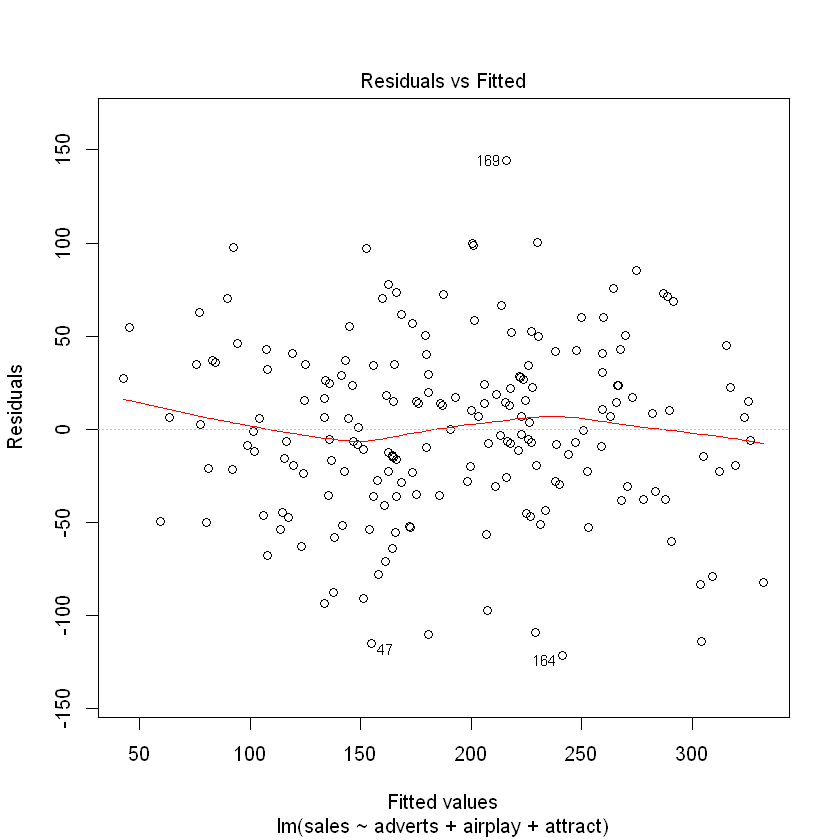

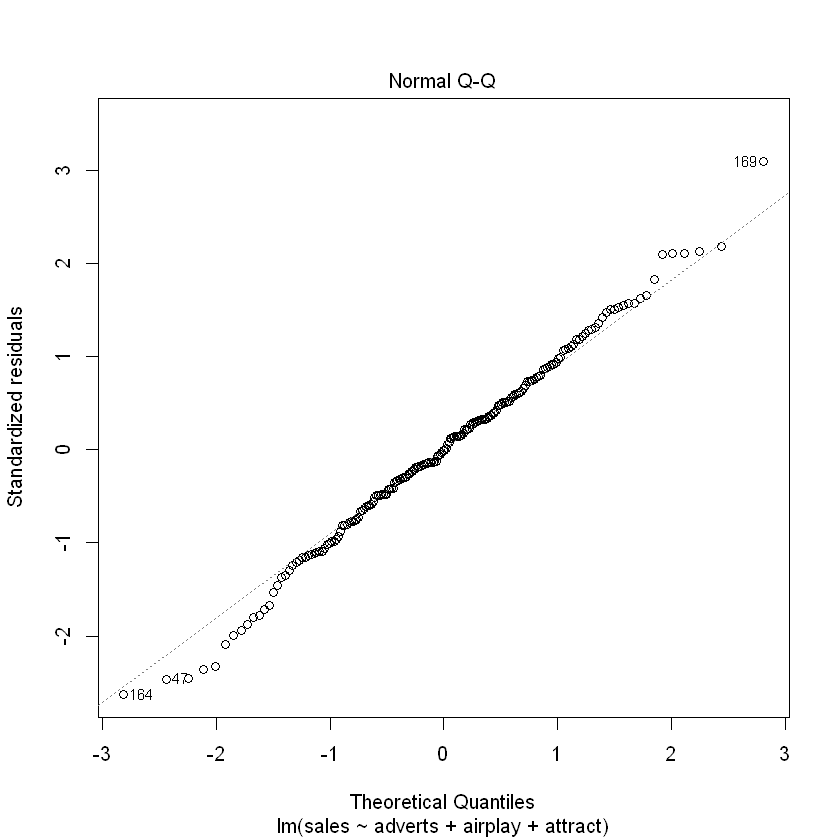

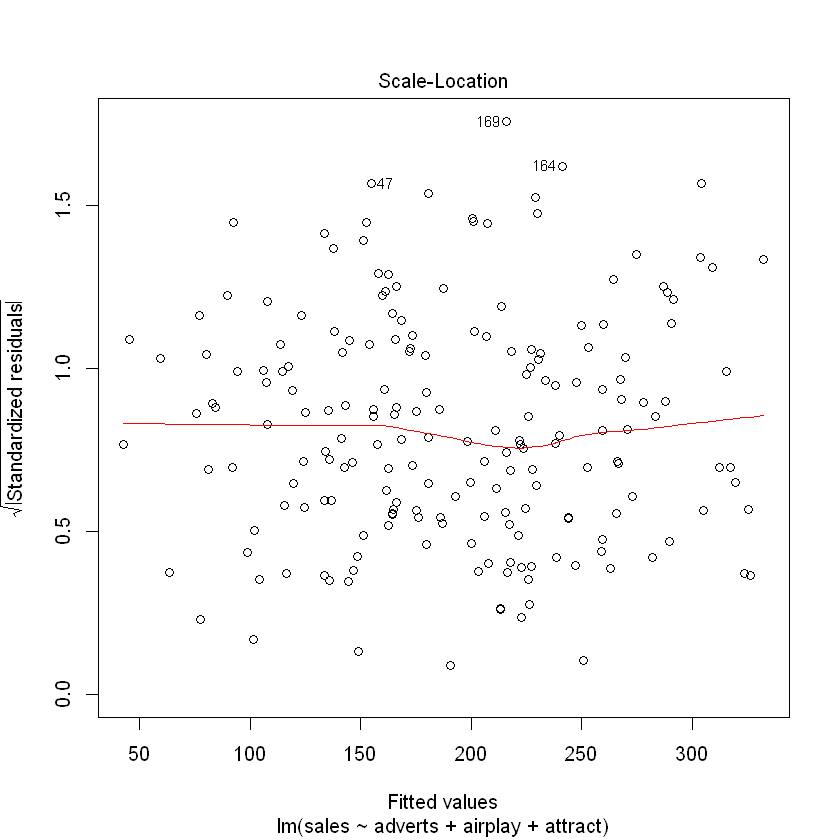

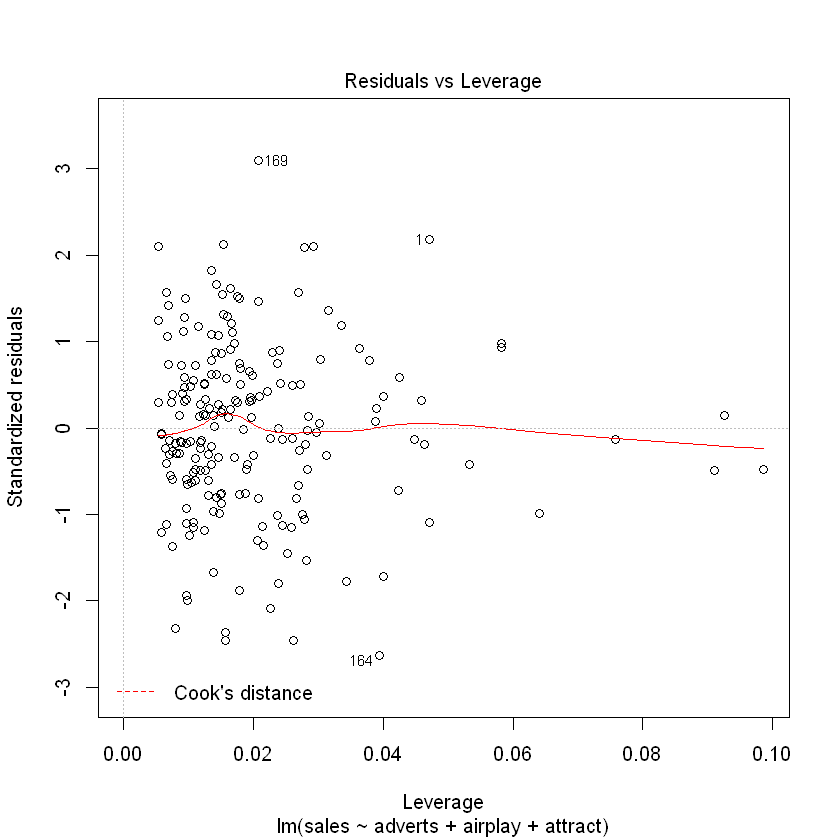

In [23]:
plot(albumSales.3)

--------------
Violated assumptions? Bootstrapping!

In [24]:
bootReg <- function (formula, data, indices) {
    d <- data
    fit <- lm(formula, data = d)
    return(coef(fit))
}

In [25]:
bootResults <- boot(statistic = bootReg, formula = sales ~ adverts + airplay + attract, data = album2, R = 2000)

In [26]:
print(bootResults)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = album2, statistic = bootReg, R = 2000, formula = sales ~ 
    adverts + airplay + attract)


Bootstrap Statistics :
        original        bias     std. error
t1* -26.61295836 -2.131628e-14 1.171665e-14
t2*   0.08488483  0.000000e+00 8.455043e-18
t3*   3.36742517  4.440892e-16 4.442003e-16
t4*  11.08633520  0.000000e+00 1.082245e-15


In [27]:
boot.ci(bootResults, type = "bca", index = 2)
boot.ci(bootResults, type = "bca", index = 3)
boot.ci(bootResults, type = "bca", index = 4)

[1] "All values of t are equal to  0.0848848251534775 \n Cannot calculate confidence intervals"


NULL

[1] "All values of t are equal to  3.36742517051031 \n Cannot calculate confidence intervals"


NULL

[1] "All values of t are equal to  11.0863352045519 \n Cannot calculate confidence intervals"


NULL

Categorical

In [28]:
gfr <- read.delim(file="GlastonburyFestivalRegression.dat", header = TRUE)

In [29]:
head(gfr)

ticknumb,music,day1,day2,day3,change
2111,Metaller,2.65,1.35,1.61,-1.04
2229,Crusty,0.97,1.41,0.29,-0.68
2338,No Musical Affiliation,0.84,NA,NA,NA
2384,Crusty,3.03,NA,NA,NA
2401,No Musical Affiliation,0.88,0.08,NA,NA
2405,Crusty,0.85,NA,NA,NA


In [30]:
contrasts(gfr$music) <- contr.treatment(4, base = 4)

In [31]:
crusty_v_NMA <- c(1, 0, 0, 0)
indie_v_NMA <- c(0, 1, 0, 0)
metal_v_NMA <- c(0, 0, 1, 0)

In [32]:
contrasts(gfr$music)<-cbind(crusty_v_NMA, indie_v_NMA, metal_v_NMA)

In [33]:
glastonburyModel<-lm(change ~ music, data = gfr) 
summary(glastonburyModel)


Call:
lm(formula = change ~ music, data = gfr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82569 -0.50489  0.05593  0.42430  1.59431 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.55431    0.09036  -6.134 1.15e-08 ***
musiccrusty_v_NMA -0.41152    0.16703  -2.464   0.0152 *  
musicindie_v_NMA  -0.40998    0.20492  -2.001   0.0477 *  
musicmetal_v_NMA   0.02838    0.16033   0.177   0.8598    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6882 on 119 degrees of freedom
  (687 observations deleted due to missingness)
Multiple R-squared:  0.07617,	Adjusted R-squared:  0.05288 
F-statistic:  3.27 on 3 and 119 DF,  p-value: 0.02369
